[숙제 1]  MNIST 데이터 학습 네트워크 구현 
- Input Data:  MNIST Dataset  
- Network: Node수가 50, 10, 40인 Hidden Layer 3개  
- Activatio Function = Sigmoid, ReLu (둘다 해 보기)  
- Last Function:  Softmax  
- Loss Function: Cross Entropy Error   
- Iteration until Loss < 0.01   
- Batch Size = 153  
- 출력그래프: Train Loss 그래프, Test Loss 그래프  
- 제출 결과물: 코드와 출력그래프 4개 (2개는 Sogmoid 일때, 2개는 ReLu 일때)  

In [1]:
import numpy as np
from dataset.mnist import load_mnist
from module import *
import matplotlib.pyplot as plt

# load data
(x_train, y_train), (x_test, y_test) = load_mnist(flatten = True, normalize=True, one_hot_label = True)

# define network
net = fc_module(input_size = x_train.shape[1], hidden_size = [50,10,40], output_size = 10, act='relu')

# define hyper parameter
train_size = x_train.shape[0]
batch_size = 153
learning_rate = 0.01

train_loss_list = []
test_loss_list = []

iter_per_epoch = max(train_size // batch_size, 1)

i = 0
iter_num = 0

while(True):
    batch_mask = np.random.choice(train_size, batch_size)
    
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    grad = net.gradient(x_batch, y_batch)
    
    for key in ('W1','b1','W2','b2','W3','b3','W4','b4'):
        net.params[key] -= learning_rate * grad[key]
    
    loss = net.loss(x_batch, y_batch)
    train_loss_list.append(loss)
    i = i+1
    
    if i % iter_per_epoch == 0:
        iter_num = iter_num+1
        test_loss = net.loss(x_test, y_test)
        test_loss_list.append(test_loss)
        if iter_num % 10 == 0:
            print(iter_num,'-> train_loss :',loss,'test_loss:',test_loss)
    if loss<0.01:
        print('loss_train_final:',loss, 'loss_test_final:',test_loss)
        break
    

10 -> train_loss : 2.2986851105164683 test_loss: 2.3010740403047296
20 -> train_loss : 2.3006385130106732 test_loss: 2.3010386546858745
30 -> train_loss : 2.3002915635859464 test_loss: 2.301025123515194
40 -> train_loss : 2.302641643728681 test_loss: 2.3010271505057123
50 -> train_loss : 2.3000054314100464 test_loss: 2.301016152797597
60 -> train_loss : 2.303781483459793 test_loss: 2.301029030272172
70 -> train_loss : 2.294613289384631 test_loss: 2.3010285059705198
80 -> train_loss : 2.3026218378198333 test_loss: 2.3010188763759123
90 -> train_loss : 2.3038647539099095 test_loss: 2.3009603645729495
100 -> train_loss : 2.3033663651166862 test_loss: 2.3010036359352606
110 -> train_loss : 2.306028605212358 test_loss: 2.3009683885540997
120 -> train_loss : 2.303474210376539 test_loss: 2.300964589664566
130 -> train_loss : 2.295637696067484 test_loss: 2.3006391447749674
140 -> train_loss : 2.2789855502431715 test_loss: 2.282425165116215
150 -> train_loss : 1.2049830172099174 test_loss: 1.26

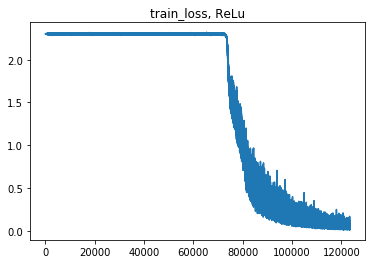

In [5]:
plt.title('train_loss, ReLu')
plt.plot(train_loss_list)
plt.show()

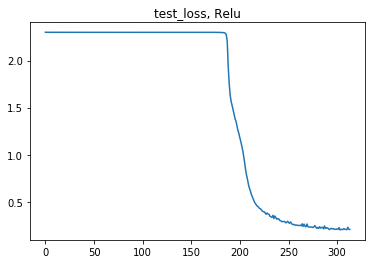

In [7]:
plt.title('test_loss, Relu')
plt.plot(test_loss_list)
plt.show()

## 위와 똑같은 코드에서 net = fc_module 부분의 인자만 act = 'sigmoid'

In [13]:
import numpy as np
from dataset.mnist import load_mnist
from module import *
import matplotlib.pyplot as plt

# load data
(x_train, y_train), (x_test, y_test) = load_mnist(flatten = True, normalize=True, one_hot_label = True)

# define network
net = fc_module(input_size = x_train.shape[1], hidden_size = [50,10,40], output_size = 10, act='sigmoid')

# define hyper parameter
train_size = x_train.shape[0]
batch_size = 153
learning_rate = 0.1

train_loss_list = []
test_loss_list = []

iter_per_epoch = max(train_size // batch_size, 1)

i = 0
iter_num = 0

while(True):
    batch_mask = np.random.choice(train_size, batch_size)
    
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    grad = net.gradient(x_batch, y_batch)
    
    for key in ('W1','b1','W2','b2','W3','b3','W4','b4'):
        net.params[key] -= learning_rate * grad[key]
    
    loss = net.loss(x_batch, y_batch)
    train_loss_list.append(loss)
    i = i+1
    
    if i % iter_per_epoch == 0:
        iter_num = iter_num+1
        test_loss = net.loss(x_test, y_test)
        test_loss_list.append(test_loss)
        if iter_num % 10 == 0:
            print(iter_num,'-> train_loss :',loss,'test_loss:',test_loss)
    if loss<0.01:
        print('loss_train_final:',loss, 'loss_test_final:',test_loss)
        break
    

10 -> train_loss : 2.296164999509224 test_loss: 2.3032522055902342
20 -> train_loss : 2.3063631505964772 test_loss: 2.302704165208855
30 -> train_loss : 2.2977034367240856 test_loss: 2.302938468787761
40 -> train_loss : 2.297439008557593 test_loss: 2.3015572949028114
50 -> train_loss : 2.2991054202969763 test_loss: 2.3027944560460814
60 -> train_loss : 2.302468461226512 test_loss: 2.301130482344214
70 -> train_loss : 2.298703062274009 test_loss: 2.3017056212321094
80 -> train_loss : 2.304236203912386 test_loss: 2.301711423886833
90 -> train_loss : 2.295284604190675 test_loss: 2.3015014178196465
100 -> train_loss : 2.2980122017169293 test_loss: 2.296693126127573
110 -> train_loss : 1.626622988130578 test_loss: 1.7236027086385077
120 -> train_loss : 1.2819022815496999 test_loss: 1.299157646296734
130 -> train_loss : 0.7714175963155154 test_loss: 0.8251864125910293
140 -> train_loss : 0.3668678712274351 test_loss: 0.4403590215275495
150 -> train_loss : 0.2309462031798619 test_loss: 0.3158

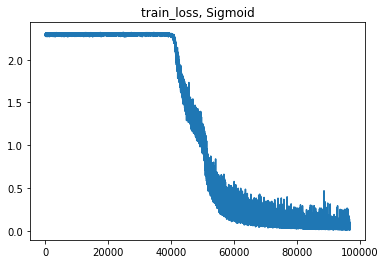

In [14]:
plt.title('train_loss, Sigmoid')
plt.plot(train_loss_list)
plt.show()

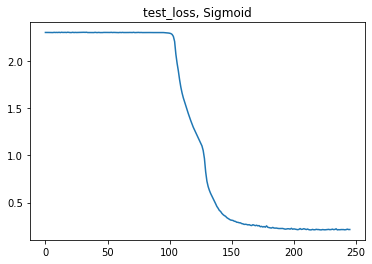

In [15]:
plt.title('test_loss, Sigmoid')
plt.plot(test_loss_list)
plt.show()